<a href="https://colab.research.google.com/github/XingruiWang/superclevr-3D-question/blob/main/inspect_superclevr3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Super-CLEVR-3D Dataset Quick View

### Download the data

Image: https://www.cs.jhu.edu/~xwang378/share/Super-CLEVR-3D/images.zip

Annotations: https://www.cs.jhu.edu/~xwang378/share/Super-CLEVR-3D/scenes.json

Questions: https://www.cs.jhu.edu/~xwang378/share/Super-CLEVR-3D/questions.zip

In [3]:
%mkdir superclevr3D
%cd superclevr3D/

/content/superclevr3D


In [4]:
# Download and unzip images
!wget https://www.cs.jhu.edu/~xwang378/share/Super-CLEVR-3D/images.zip

--2024-01-25 17:31:39--  https://www.cs.jhu.edu/~xwang378/share/Super-CLEVR-3D/images.zip
Resolving www.cs.jhu.edu (www.cs.jhu.edu)... 128.220.13.64
Connecting to www.cs.jhu.edu (www.cs.jhu.edu)|128.220.13.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11862695112 (11G) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  11.05G  49.4MB/s    in 3m 53s  

2024-01-25 17:35:32 (48.7 MB/s) - ‘images.zip’ saved [11862695112/11862695112]



In [ ]:
!unzip images.zip

In [6]:
# Download scenes annotations
!wget https://www.cs.jhu.edu/~xwang378/share/Super-CLEVR-3D/scenes.json

--2024-01-25 17:38:07--  https://www.cs.jhu.edu/~xwang378/share/Super-CLEVR-3D/scenes.json
Resolving www.cs.jhu.edu (www.cs.jhu.edu)... 128.220.13.64
Connecting to www.cs.jhu.edu (www.cs.jhu.edu)|128.220.13.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 901461817 (860M) [application/json]
Saving to: ‘scenes.json’

scenes.json         100%[===================>] 859.70M  40.7MB/s    in 17s     

2024-01-25 17:38:25 (49.3 MB/s) - ‘scenes.json’ saved [901461817/901461817]



In [7]:
# Download and unzip questions
!wget https://www.cs.jhu.edu/~xwang378/share/Super-CLEVR-3D/questions.zip

--2024-01-25 17:38:25--  https://www.cs.jhu.edu/~xwang378/share/Super-CLEVR-3D/questions.zip
Resolving www.cs.jhu.edu (www.cs.jhu.edu)... 128.220.13.64
Connecting to www.cs.jhu.edu (www.cs.jhu.edu)|128.220.13.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75431625 (72M) [application/zip]
Saving to: ‘questions.zip’

questions.zip       100%[===================>]  71.94M  41.6MB/s    in 1.7s    

2024-01-25 17:38:27 (41.6 MB/s) - ‘questions.zip’ saved [75431625/75431625]



In [8]:
!unzip questions.zip

Archive:  questions.zip
   creating: questions/
  inflating: questions/superclevr_questions_pose.json  
  inflating: questions/superclevr_questions_obj_occlusion.json  
  inflating: questions/superclevr_questions_occlusion.json  
  inflating: questions/superclevr_questions_parts.json  


### Inspect data

In [9]:
import json
import os
from PIL import Image
import matplotlib.pyplot as plt

In [10]:
image_path = '/content/superclevr3D/images'

In [11]:
scenes = json.load(open('/content/superclevr3D/scenes.json'))
questions = {
    'object_occlusion': json.load(open('/content/superclevr3D/questions/superclevr_questions_obj_occlusion.json')),
    'occlusion': json.load(open('/content/superclevr3D/questions/superclevr_questions_occlusion.json')),
    'parts': json.load(open('/content/superclevr3D/questions/superclevr_questions_parts.json')),
    'pose': json.load(open('/content/superclevr3D/questions/superclevr_questions_pose.json'))
}

In [13]:
idx_mapping = {s['image_index']: i for i, s in enumerate(scenes['scenes'])}

In [14]:
def show_question(idx, question_type, questions = questions, image_path = image_path, scenes = scenes):
  question_dict = questions[question_type]['questions'][idx]
  image_filename = question_dict['image_filename']
  image_idx = question_dict['image_index']
  print(image_filename, image_idx)
  question = question_dict['question']
  answer = question_dict['answer']
  print('Question: {}\nAnswer: {}'.format(question, answer))

  print('\nAll objects:')
  scene = scenes['scenes'][idx_mapping[image_idx]]
  for i, obj in enumerate(scene['objects']):
    # print(obj.keys())
    occluded = scene['occlusion'][str(i)]['obj']
    occluded_level, occlussion_mask, visible_before_occlusion, *occluded_by = occluded
    print("Object {}: shape: {}, color = {}, material = {}, size = {}, pose = {}, occluded = {}".format(
        i,
        obj['shape'],
        obj['color'],
        obj['material'],
        obj['size'],
        obj['pose'],
        bool(occluded_level)
    ))


  print("\nReasoning programs:")
  for i, step in enumerate(question_dict['program']):
    print("Step {}: Program name: {}; Input value: {}; Output Objects: {}".format(i,
                                                                                  step['type'],
                                                                                  step['value_inputs'].__repr__(),
                                                                                  step['_output'].__repr__())
    )

  # show image
  print("\nImage name: {}".format(image_filename))
  image = Image.open(os.path.join(image_path, image_filename))

  plt.imshow(image)
  plt.axis('off')
  plt.plot()

superCLEVR_new_029998.png 29998
Question: What is the shape of the object that occludes the small gray object?
Answer: minivan

All objects:
Object 0: shape: airliner, color = cyan, material = metal, size = small, pose = back_pose, occluded = False
Object 1: shape: cruiser, color = gray, material = metal, size = large, pose = right_pose, occluded = False
Object 2: shape: utility, color = red, material = metal, size = small, pose = None, occluded = False
Object 3: shape: school, color = gray, material = metal, size = small, pose = right_pose, occluded = True
Object 4: shape: jet, color = cyan, material = rubber, size = large, pose = left_pose, occluded = False
Object 5: shape: minivan, color = green, material = rubber, size = large, pose = right_pose, occluded = True
Object 6: shape: suv, color = purple, material = rubber, size = small, pose = None, occluded = False

Reasoning programs:
Step 0: Program name: scene; Input value: []; Output Objects: [0, 1, 2, 3, 4, 5, 6]
Step 1: Program n

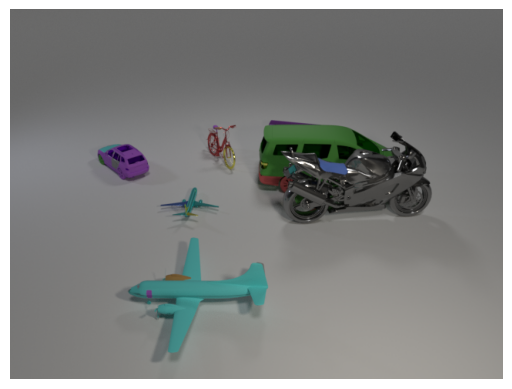

In [16]:
show_question(idx = -1,
              question_type = 'object_occlusion')